In [1]:
import pandas as pd
df = pd.read_csv("globalterrorismdb_0718dist.csv", dtype=unicode)

In [2]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqu� to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


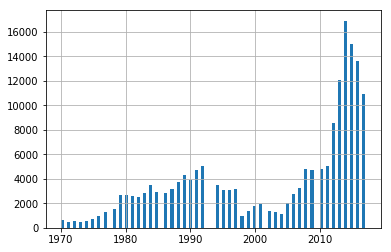

In [4]:
df['iyear'].astype(int).hist(bins = 100)

In [5]:
byCountry = df.groupby(['iyear', 'country_txt'])['iyear'].agg('count').unstack()

In [6]:
byCountry[:5]

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
iyear,,,,,,,,,,,,,,,,,,,,,
1970,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,1.0,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,1.0,NaN,...,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,1.0,NaN
1972,NaN,NaN,1.0,NaN,NaN,NaN,20.0,NaN,8.0,7.0,...,NaN,NaN,1.0,24.0,NaN,NaN,NaN,3.0,NaN,NaN
1973,1.0,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,2.0,...,NaN,NaN,NaN,27.0,NaN,NaN,1.0,1.0,1.0,NaN
1974,NaN,NaN,NaN,1.0,NaN,NaN,71.0,NaN,1.0,1.0,...,NaN,NaN,NaN,28.0,NaN,NaN,1.0,NaN,NaN,NaN


In [7]:
topTerror = pd.DataFrame(byCountry.idxmax(axis = 1))
topTerror.columns = ['Country Name']
topCount =  pd.DataFrame(topTerror.groupby('Country Name')['Country Name'].agg('count'))
topCount.columns = ['Country']
topCount = topCount.reset_index()
topCount.columns = ['Country', 'Occurrences as Top Terrorism Target']
topCount = topCount.set_index('Country')
topCount.sort_values(by = 'Occurrences as Top Terrorism Target', ascending = False)

,Occurrences as Top Terrorism Target
Country,
Iraq,13
Peru,7
Colombia,5
El Salvador,5
United Kingdom,5
India,4
Italy,2
Pakistan,2
United States,2


In [8]:
topCount.index.values

array(['Algeria', 'Colombia', 'El Salvador', 'India', 'Iraq', 'Italy',
       'Pakistan', 'Peru', 'Turkey', 'United Kingdom', 'United States'],
      dtype=object)

In [9]:
topCountries = byCountry[['Algeria', 'Colombia', 'El Salvador', 'India', 'Iraq', 'Italy','Pakistan', 'Peru', 'Turkey', 'United Kingdom', 'United States']]

In [10]:
topCountries[:5]

country_txt,Algeria,Colombia,El Salvador,India,Iraq,Italy,Pakistan,Peru,Turkey,United Kingdom,United States
iyear,,,,,,,,,,,
1970,NaN,1.0,NaN,NaN,NaN,3.0,1.0,NaN,12.0,12.0,468.0
1971,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,35.0,81.0,247.0
1972,1.0,2.0,2.0,1.0,NaN,4.0,NaN,NaN,9.0,292.0,68.0
1973,NaN,6.0,1.0,NaN,NaN,15.0,NaN,3.0,NaN,189.0,58.0
1974,NaN,NaN,3.0,NaN,NaN,22.0,2.0,3.0,1.0,203.0,94.0


Text(0,0.5,'Number of Terrorist Attacks')

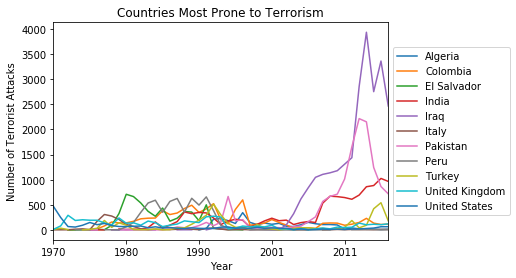

In [11]:
ax = topCountries.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Countries Most Prone to Terrorism')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Terrorist Attacks')

In [12]:
cityCountry = df.groupby(['country_txt', 'city'])['city'].agg('count').unstack()

In [13]:
cityCountry = cityCountry.drop('Unknown', axis = 1)

In [14]:
transposeCityCountry = cityCountry.T

In [15]:
transposeCityCountry

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
city,,,,,,,,,,,,,,,,,,,,,
62 miles South of Dushanbe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Coruna district,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A'arbaniyeh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANkara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aab Kamra,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabdeh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabgarmak,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aachen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
list(transposeCityCountry['Afghanistan'].nlargest().index.values)

['Kabul', 'Kandahar', 'Jalalabad', 'Lashkar Gah', 'Ghazni']

In [17]:
transposeCityCountry['Afghanistan'].idxmax()

'Kabul'

In [18]:
for col in transposeCityCountry:
    print col, list(transposeCityCountry[col].nlargest().index.values)

Afghanistan ['Kabul', 'Kandahar', 'Jalalabad', 'Lashkar Gah', 'Ghazni']
Albania ['Tirana', 'Gjirokaster', 'Vlore', 'Shkoder', 'Fier']
Algeria ['Algiers', 'Blida', 'Constantine', 'Tizi Ouzou', 'Lakhdaria']
Andorra []
Angola ['Luanda', 'Cassoalala', 'Icolo e Bengo district', 'Huambo', 'Dondo']
Antigua and Barbuda ["St. John's"]
Argentina ['Buenos Aires', 'Cordoba', 'Rosario', 'La Plata', 'Mendoza']
Armenia ['Yerevan', 'Bagratashen', 'Artik', 'Gyumri', 'Kanaker-Zeytun']
Australia ['Sydney', 'Melbourne', 'Canberra', 'Perth', 'Brisbane']
Austria ['Vienna', 'Salzburg', 'Linz', 'Graz', 'Klagenfurt']
Azerbaijan ['Baku', 'Stepanaket', 'Zaqatala', 'Aliabad', 'Asadly']
Bahamas ['Nassau', 'Anguilla Cays']
Bahrain ['Manama', 'Sitra', 'Daih', 'Hamad', 'Bani Jamra']
Bangladesh ['Dhaka', 'Chittagong', 'Rajshahi', 'Khulna', 'Sylhet']
Barbados ['Bridgetown', 'Grantly Adams International Airport', 'Saint Joseph']
Belarus ['Minsk', 'Hrodna', 'Vitebsk', 'Zhlobin']
Belgium ['Brussels', 'Antwerp', 'Charleroi

In [19]:
maxCity = pd.DataFrame(transposeCityCountry.max())
maxCity

,0
country_txt,
Afghanistan,738.0
Albania,25.0
Algeria,407.0
Andorra,NaN
Angola,66.0
Antigua and Barbuda,1.0
Argentina,458.0
Armenia,16.0
Australia,29.0


In [20]:
totalNoUnknown = df[ df['city'] != 'Unknown'].groupby('country_txt')['country_txt'].agg('count')

In [21]:
idmaxCity = pd.DataFrame(transposeCityCountry.idxmax())
idmaxCity

,0
country_txt,
Afghanistan,Kabul
Albania,Tirana
Algeria,Algiers
Andorra,NaN
Angola,Luanda
Antigua and Barbuda,St. John's
Argentina,Buenos Aires
Armenia,Yerevan
Australia,Sydney


In [22]:
MaxCityCount = pd.merge(maxCity, idmaxCity, left_index = True, right_index = True)
MaxCityCount = pd.merge(MaxCityCount, totalNoUnknown, left_index = True, right_index = True)
MaxCityCount['prop'] = MaxCityCount['0_x'] / MaxCityCount['country_txt'] 
MaxCityCount.sort_values(by = 'prop', ascending = False)

,0_x,0_y,country_txt,prop
country_txt,,,,
Romania,6.0,Bucharest,6,1.000000
St. Kitts and Nevis,1.0,Basseterre,1,1.000000
Turkmenistan,1.0,Ashgabat,1,1.000000
Equatorial Guinea,1.0,Malabo,1,1.000000
Falkland Islands,1.0,Stanley,1,1.000000
Wallis and Futuna,1.0,Matautu,1,1.000000
French Polynesia,3.0,Papeete,3,1.000000
Gambia,3.0,Banjul,3,1.000000
Vatican City,1.0,Vatican City,1,1.000000


In [23]:
top5city = dict((transposeCityCountry[country].nlargest().name, transposeCityCountry[country].nlargest().sum()) for country in transposeCityCountry)
top5city

{'Afghanistan': 1746.0,
 'Albania': 47.0,
 'Algeria': 593.0,
 'Andorra': 0.0,
 'Angola': 203.0,
 'Antigua and Barbuda': 1.0,
 'Argentina': 604.0,
 'Armenia': 21.0,
 'Australia': 63.0,
 'Austria': 92.0,
 'Azerbaijan': 33.0,
 'Bahamas': 5.0,
 'Bahrain': 87.0,
 'Bangladesh': 797.0,
 'Barbados': 3.0,
 'Belarus': 13.0,
 'Belgium': 137.0,
 'Belize': 6.0,
 'Benin': 6.0,
 'Bhutan': 4.0,
 'Bolivia': 249.0,
 'Bosnia-Herzegovina': 67.0,
 'Botswana': 9.0,
 'Brazil': 168.0,
 'Brunei': 6.0,
 'Bulgaria': 41.0,
 'Burkina Faso': 18.0,
 'Burundi': 319.0,
 'Cambodia': 88.0,
 'Cameroon': 82.0,
 'Canada': 54.0,
 'Central African Republic': 114.0,
 'Chad': 27.0,
 'Chile': 1973.0,
 'China': 55.0,
 'Colombia': 2345.0,
 'Comoros': 4.0,
 'Costa Rica': 56.0,
 'Croatia': 23.0,
 'Cuba': 29.0,
 'Cyprus': 110.0,
 'Czech Republic': 23.0,
 'Czechoslovakia': 9.0,
 'Democratic Republic of the Congo': 125.0,
 'Denmark': 40.0,
 'Djibouti': 18.0,
 'Dominica': 3.0,
 'Dominican Republic': 67.0,
 'East Germany (GDR)': 38.0,
 

In [24]:
top5cityName = dict((transposeCityCountry[country].nlargest().name, ', '.join(list(transposeCityCountry[country].nlargest().index.values))) for country in transposeCityCountry)
top5cityName

{'Afghanistan': 'Kabul, Kandahar, Jalalabad, Lashkar Gah, Ghazni',
 'Albania': 'Tirana, Gjirokaster, Vlore, Shkoder, Fier',
 'Algeria': 'Algiers, Blida, Constantine, Tizi Ouzou, Lakhdaria',
 'Andorra': '',
 'Angola': 'Luanda, Cassoalala, Icolo e Bengo district, Huambo, Dondo',
 'Antigua and Barbuda': "St. John's",
 'Argentina': 'Buenos Aires, Cordoba, Rosario, La Plata, Mendoza',
 'Armenia': 'Yerevan, Bagratashen, Artik, Gyumri, Kanaker-Zeytun',
 'Australia': 'Sydney, Melbourne, Canberra, Perth, Brisbane',
 'Austria': 'Vienna, Salzburg, Linz, Graz, Klagenfurt',
 'Azerbaijan': 'Baku, Stepanaket, Zaqatala, Aliabad, Asadly',
 'Bahamas': 'Nassau, Anguilla Cays',
 'Bahrain': 'Manama, Sitra, Daih, Hamad, Bani Jamra',
 'Bangladesh': 'Dhaka, Chittagong, Rajshahi, Khulna, Sylhet',
 'Barbados': 'Bridgetown, Grantly Adams International Airport, Saint Joseph',
 'Belarus': 'Minsk, Hrodna, Vitebsk, Zhlobin',
 'Belgium': 'Brussels, Antwerp, Charleroi, Liege, Vielsalm',
 'Belize': 'Belize City, Belmop

In [25]:
top5cityFrame = pd.DataFrame.from_dict(top5city, orient='index', columns = ['count top 5 city'])
top5cityFrame

,count top 5 city
Canada,54.0
East Timor,6.0
Turkmenistan,1.0
Lithuania,8.0
Cambodia,88.0
West Bank and Gaza Strip,926.0
East Germany (GDR),38.0
Ethiopia,79.0
Swaziland,13.0
Argentina,604.0


In [26]:
top5cityNameFrame = pd.DataFrame.from_dict(top5cityName, orient='index', columns = ['topCity'])
top5cityNameFrame

,topCity
Canada,"Montreal, Ottawa, Toronto, Edmonton, Vancouver"
East Timor,"Dili, Aidabasalala, Atabae, Atsabe, Balibo"
Turkmenistan,Ashgabat
Lithuania,"Vilnius, Gargzdai, Panemune, Sumskas"
Cambodia,"Phnom Penh, Battambang, Siem Reap, Poipet, Pursat"
West Bank and Gaza Strip,"Gaza, Hebron, Nablus, Jerusalem, Ramallah"
East Germany (GDR),"Berlin, Magdeburg"
Ethiopia,"Addis Ababa, Dire Dawa, Jakawa, Jijiga, Asmara"
Swaziland,"Mbabane, Manzini, Big Bend, Ludzeludze, Matsapha"
Argentina,"Buenos Aires, Cordoba, Rosario, La Plata, Mendoza"


In [27]:
pd.set_option('display.max_colwidth', -1)
top5Total = pd.merge(top5cityFrame, totalNoUnknown, left_index = True, right_index = True)
top5Total = pd.merge(top5Total, top5cityNameFrame, left_index = True, right_index = True)
top5Total
top5Total.columns = ['count top 5 city', 'total (no unknown)', 'top city']
top5Total['prop top 5 city'] = top5Total['count top 5 city'] / top5Total['total (no unknown)']
sortTop5 = top5Total.sort_values(by = 'total (no unknown)', ascending = False)
sortTop5.columns = ['Attacks Within Top Five Cities', 'Total Number of Attacks', 'Top 5 Cities With Most Attacks', 'Proportion of Total Attacks']
sortTop5[['Top 5 Cities With Most Attacks', 'Proportion of Total Attacks']].iloc[:20].sort_values(by = 'Proportion of Total Attacks', ascending = False)

,Top 5 Cities With Most Attacks,Proportion of Total Attacks
Chile,"Santiago, Valparaiso, Concepcion, Vina del Mar, Temuco",0.853374
United Kingdom,"Belfast, London, Londonderry, Armagh, Newry",0.616521
Lebanon,"Beirut, Tripoli, Sidon, Arsal, Tyre",0.611346
Somalia,"Mogadishu, Kismayo, Baidoa, Beledweyne, Afgoye",0.534568
Peru,"Lima, Ayacucho, Huancayo, Cerro de Pasco, Ayacucho district",0.530482
Iraq,"Baghdad, Mosul, Kirkuk, Baqubah, Fallujah",0.502575
Spain,"Madrid, Bilbao, Donostia-San Sebastian, Barcelona, Pamplona",0.436705
El Salvador,"San Salvador, Santa Ana, San Miguel, San Vicente, Usulutan",0.432114
Turkey,"Istanbul, Ankara, Diyarbakir, Izmir, Adana",0.422791
Yemen,"Sanaa, Aden, Taizz, Mukalla, Zinjibar",0.422048


In [28]:
indexout = sortTop5.reset_index()
indexout = indexout[ indexout['index'].isin(topCount.index.values)].set_index('index')
indexout.index.name = 'Country'
indexout[['Top 5 Cities With Most Attacks', 'Proportion of Total Attacks']].sort_values(by = 'Proportion of Total Attacks', ascending = False)

,Top 5 Cities With Most Attacks,Proportion of Total Attacks
Country,,
Italy,"Rome, Milan, Turin, Bologna, Florence",0.635309
United Kingdom,"Belfast, London, Londonderry, Armagh, Newry",0.616521
Peru,"Lima, Ayacucho, Huancayo, Cerro de Pasco, Ayacucho district",0.530482
Iraq,"Baghdad, Mosul, Kirkuk, Baqubah, Fallujah",0.502575
El Salvador,"San Salvador, Santa Ana, San Miguel, San Vicente, Usulutan",0.432114
Turkey,"Istanbul, Ankara, Diyarbakir, Izmir, Adana",0.422791
Pakistan,"Karachi, Peshawar, Quetta, Lahore, Jamrud",0.327738
Colombia,"Bogota, Medellin, Cali, Bucaramanga, Barrancabermeja",0.317321
United States,"New York City, San Juan, Los Angeles, San Francisco, Miami",0.307692


In [29]:
sortTop5['Proportion of Total Attacks'].std()

0.2719235890851399

Text(0,0.5,'Country Frequency')

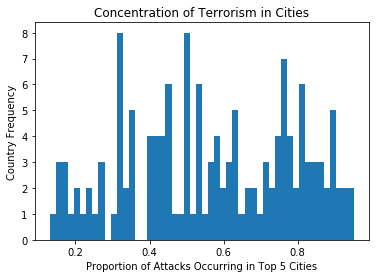

In [30]:
ax = sortTop5[sortTop5['Proportion of Total Attacks'] < 1]['Proportion of Total Attacks'].plot(kind = 'hist', bins = 50)
ax.set_title('Concentration of Terrorism in Cities')
ax.set_xlabel('Proportion of Attacks Occurring in Top 5 Cities')
ax.set_ylabel('Country Frequency')

In [31]:
df.groupby('attacktype1_txt')['attacktype1_txt'].agg('count')

attacktype1_txt
Armed Assault                          42669
Assassination                          19312
Bombing/Explosion                      88255
Facility/Infrastructure Attack         10356
Hijacking                              659  
Hostage Taking (Barricade Incident)    991  
Hostage Taking (Kidnapping)            11158
Unarmed Assault                        1015 
Unknown                                7276 
Name: attacktype1_txt, dtype: int64

In [32]:
noUnknown = df[ df['attacktype1_txt'] != 'Unknown']
normTypeCountry = pd.crosstab(noUnknown['country_txt'], noUnknown['attacktype1_txt'], normalize = 'index')

In [33]:
pd.crosstab(noUnknown['country_txt'], noUnknown['attacktype1_txt'])

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault
country_txt,,,,,,,,
Afghanistan,2877,954,6245,355,16,27,1011,73
Albania,11,14,48,1,0,0,2,2
Algeria,913,431,1088,53,9,4,97,1
Andorra,1,0,0,0,0,0,0,0
Angola,124,28,256,19,0,1,28,1
Antigua and Barbuda,0,0,0,1,0,0,0,0
Argentina,88,137,453,39,1,5,72,7
Armenia,4,6,10,1,1,1,1,0
Australia,14,10,39,38,0,3,0,4


In [34]:
normTypeCountry

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault
country_txt,,,,,,,,
Afghanistan,0.248918,0.082540,0.540318,0.030715,0.001384,0.002336,0.087472,0.006316
Albania,0.141026,0.179487,0.615385,0.012821,0.000000,0.000000,0.025641,0.025641
Algeria,0.351695,0.166025,0.419106,0.020416,0.003467,0.001541,0.037365,0.000385
Andorra,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.271335,0.061269,0.560175,0.041575,0.000000,0.002188,0.061269,0.002188
Antigua and Barbuda,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Argentina,0.109726,0.170823,0.564838,0.048628,0.001247,0.006234,0.089776,0.008728
Armenia,0.166667,0.250000,0.416667,0.041667,0.041667,0.041667,0.041667,0.000000
Australia,0.129630,0.092593,0.361111,0.351852,0.000000,0.027778,0.000000,0.037037


In [35]:
for col in normTypeCountry:
    print col, normTypeCountry[col].mean()

Armed Assault 0.225467674107
Assassination 0.133420781733
Bombing/Explosion 0.415234215773
Facility/Infrastructure Attack 0.114256764377
Hijacking 0.0191488499917
Hostage Taking (Barricade Incident) 0.00946491201982
Hostage Taking (Kidnapping) 0.063774806615
Unarmed Assault 0.0192319953842


In [36]:
normTypeCountry.columns.values

array(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault'], dtype=object)

Text(0.5,1,'Facility/Infrastructure Attack')

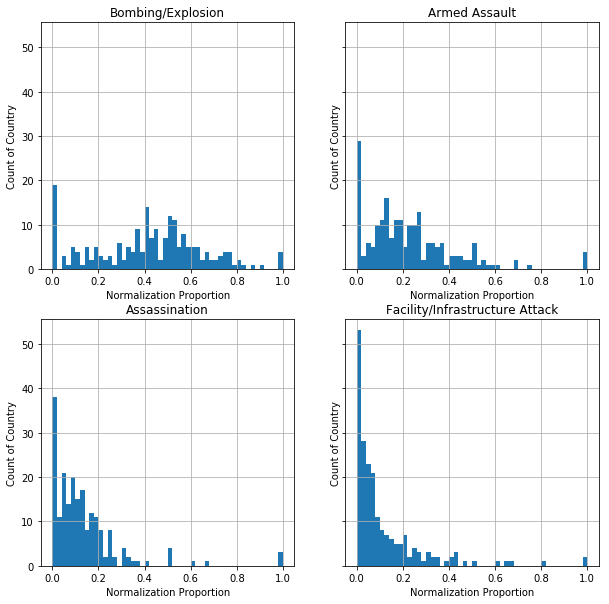

In [37]:
#histogram of normalized frequency of different attack types
fig, ((ax1, ax2), (ax3, ax4)) = subplots(nrows=2,
                                ncols=2,
                                sharex=False,
                                sharey=True,
                                figsize=(10, 10))

normTypeCountry['Bombing/Explosion'].hist(ax = ax1, bins = 50)
normTypeCountry['Armed Assault'].hist(ax = ax2, bins = 50)
normTypeCountry['Assassination'].hist(ax = ax3, bins = 50)
normTypeCountry['Facility/Infrastructure Attack'].hist(ax = ax4, bins = 50)

ax1.set_ylabel('Count of Country')
ax2.set_ylabel('Count of Country')
ax3.set_ylabel('Count of Country')
ax4.set_ylabel('Count of Country')

ax1.set_xlabel('Normalization Proportion')
ax2.set_xlabel('Normalization Proportion')
ax3.set_xlabel('Normalization Proportion')
ax4.set_xlabel('Normalization Proportion')

ax1.set_title('Bombing/Explosion')
ax2.set_title('Armed Assault')
ax3.set_title('Assassination')
ax4.set_title('Facility/Infrastructure Attack')

In [38]:
CountryTypeAttackMax = pd.DataFrame(normTypeCountry.idxmax(axis = 1))
CountryTypeAttackMax.columns = ['most common type']

CountryTypeAttackMaxProp = pd.DataFrame(normTypeCountry.max(axis = 1))
CountryTypeAttackMaxProp.columns = ['most common type prop']

In [40]:
lab = normalizedType.groupby('most common type')['most common type'].agg('count').sort_values(ascending = False).index

Text(0,0.5,'')

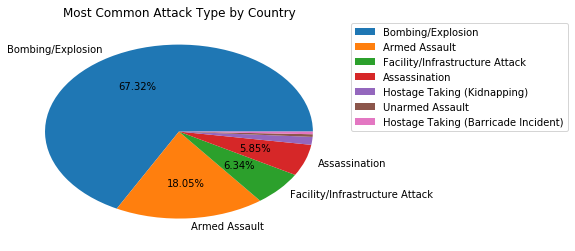

In [42]:
#number of countries where each type is most common (under normalization)
normalizedType = pd.merge(CountryTypeAttackMax, CountryTypeAttackMaxProp, left_index=True, right_index=True)

def my_autopct(pct):
    return ('%.2f' % pct)+'%' if pct > 5 else ''


ax = normalizedType.groupby('most common type')['most common type'].agg('count').sort_values(ascending = False).plot(kind = 'pie', labels = ['Bombing/Explosion', 'Armed Assault', 'Facility/Infrastructure Attack', 'Assassination', '', '', '', ''], autopct=my_autopct)
ax.set_title('Most Common Attack Type by Country')
ax.legend(loc='center left', bbox_to_anchor=(1, .75), labels = lab)
ax.set_ylabel('')